## Pymaceuticals Observations

Capomulin was the most successful treatment of the four drugs analyzed during the duration of the tests. Capomulin was the only drug that reduced tumor mass over the course of treatment resulting in a 19% decrease in overall size while Infubinol, Ketapril and the placebo had an increase in size of 46% or more. While all drugs showed an increase in metastatic sites, Capomulin had the slowest growth of all, far below that of the placebo. Capomulin showed significantly higher survival rates than all others with 83% of mice still alive at end of treatment, nearly four times better than the placebo.

Infubinol showed an increase of tumor volume over duration of treatment similar to that of the placebo, but had a lower growth of metasatic sites.  Despite the overal metatstic site count, Infubinol still showed a higher metatsatic growth rate than that of Capomulin.  Infubinol had the lowest survival rate of the other two drugs and even performed worse than the placebo. 

Ketapril was the drug that performed on trend with that of the placebo in most tests. Ketapril did have the largest increase of tumor volume over course of treatment, showing slightly larger than that of the placebo.  While initial days of treatment showed Ketapril's metastatic site growth was slightly less than that of the placebo, in final days it did perform worse and ended up higher than the placebo. Survival rates ended upon par with that of placebo but in overall measurement of tumor mass, Ketapril performed the worse of all tested with a 57.03% increase.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data into their own dataframes
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)


In [2]:
# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data, on='Mouse ID', how='outer')

# list of drugs we want to use in data analysis
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

# update to only include the 4 drugs we're reporting on: Capomulin, Infubinol, Ketapril, and Placebo
cond = combined_data['Drug'].isin(drugs)
combined_data = combined_data[cond]
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Volume During Treatment

In [3]:
# find the average tumor volum by drug and timepoint
tumor_vols_mean = combined_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

#reformat so we have timepoint as index and each drug has its own column of values
tumor_vols_mean = tumor_vols_mean.unstack(level=0)

tumor_vols_mean.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [4]:
# find the standard error tumor volume by drug and timepoint
tumor_vols_sem = combined_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# reformat the data so we have timepoint as the index and each drug has it's own column of values
tumor_vols_sem = tumor_vols_sem.unstack(level=0)

tumor_vols_sem.head().head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


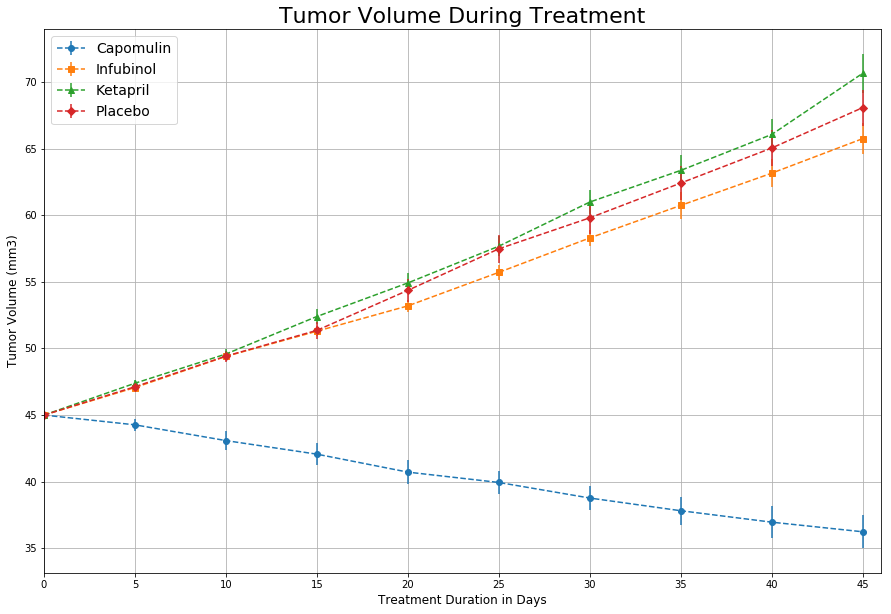

In [5]:
#build the Tumor Volume Over Time Chart
x_axis = tumor_vols_mean.index

# create an array of marker types we'll use for each series
marker_array = ['o', 's', '^', 'D']

# Setting up the plot for Tumor Response to Treatment
fig = plt.subplots(figsize=(15,10))
plt.title('Tumor Volume During Treatment', fontsize='22')
plt.xlabel('Treatment Duration in Days', fontsize='12')
plt.ylabel('Tumor Volume (mm3)', fontsize ='12')
plt.xlim(0, tumor_vols_mean.index.max() + 1) 
plt.xticks(np.arange(0, tumor_vols_mean.index.max()+3 , 5)) # location of separators for timepoint every 5 days
plt.grid()

# loop through each drug we have to plot the lines so we don't have to write each manually
loop_index = 0
for drug in drugs:
#     print(marker_array[loop_index])
#     ax.errorbar(x_axis, tumor_vols_mean[drug], tumor_vols_sem[drug], linestyle='-', fmt=marker_array[loop_index])
    plt.errorbar(x_axis, tumor_vols_mean[drug], tumor_vols_sem[drug], linestyle='--', marker=marker_array[loop_index])
    loop_index += 1

plt.legend(fontsize='14')
plt.show()

## Metastatic Sites During Treatment

In [6]:
# find the mean metastatic count by drug and timepoint
meta_sites_mean = combined_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# reformat the data so we have timepoint as the index and each drug has it's own column of values
meta_sites_mean = meta_sites_mean.unstack(level=0)

meta_sites_mean.head().head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [7]:
# find the standard error of metastatic count by drug and timepoint
meta_sites_sem = combined_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# reformat the data so we have timepoint as the index and each drug has it's own column of values
meta_sites_sem = meta_sites_sem.unstack(level=0)

meta_sites_sem.head().head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


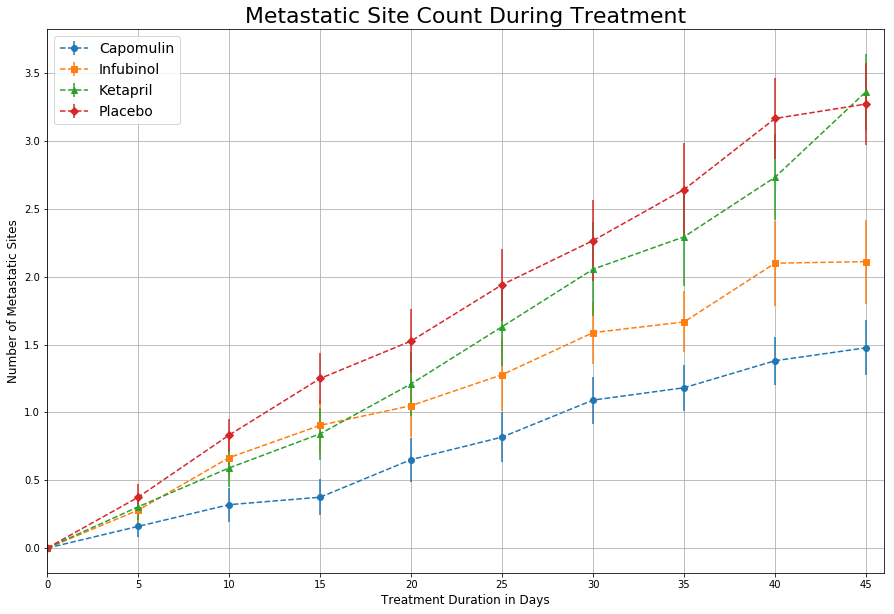

In [8]:
#build the Metastatic Site Count Over Time Chart

# Setting up the plot for Metastatic Response to Treatment
fig, ax = plt.subplots(figsize=(15,10))
plt.title('Metastatic Site Count During Treatment', fontsize='22')
plt.xlabel('Treatment Duration in Days', fontsize='12')
plt.ylabel('Number of Metastatic Sites', fontsize='12')
plt.xlim(0, meta_sites_mean.index.max() + 1) 
plt.xticks(np.arange(0, meta_sites_mean.index.max()+3 , 5)) # location of separators for timepoint every 5 days
plt.grid()

# loop through each drug we have to plot the lines so we don't have to write each manually
loop_index = 0
for drug in drugs:
#     print(marker_array[loop_index])
    ax.errorbar(x_axis, meta_sites_mean[drug], meta_sites_sem[drug], linestyle='--', marker=marker_array[loop_index])
    loop_index += 1
    
plt.legend(fontsize='14')
plt.show()


## Mouse Survival Rates

In [9]:
# get count of mice by drug and timepoint
mouse_count =combined_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

# reformat the data so we have timepoint as the index and each drug has it's own column of values
mouse_count = mouse_count.unstack(level=0)

mouse_count

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


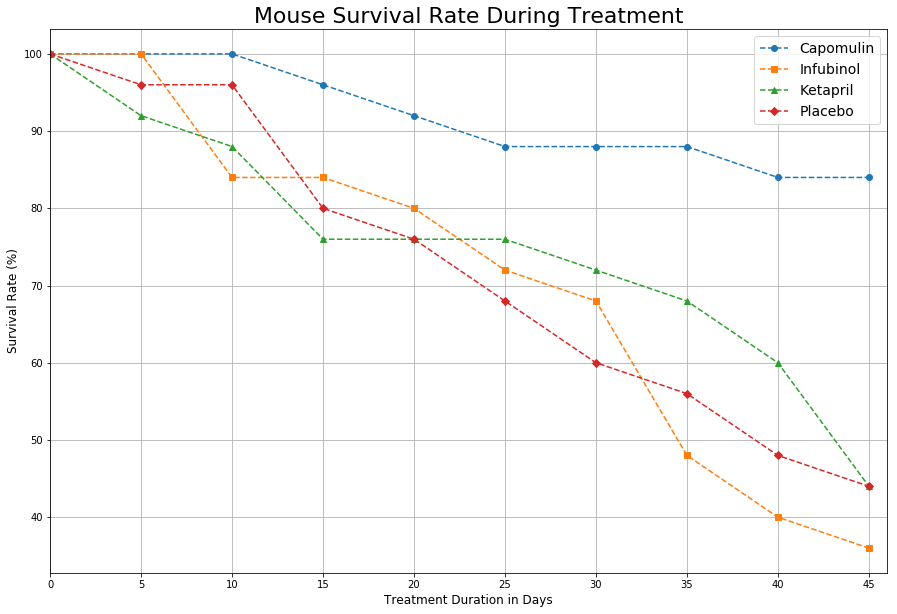

In [10]:
#build the Metastatic Site Count Over Time Chart
x_axis = mouse_count.index

# Setting up the plot for Metastatic Response to Treatment
fig, ax = plt.subplots(figsize=(15,10))
plt.title('Mouse Survival Rate During Treatment', fontsize='22')
plt.xlabel('Treatment Duration in Days', fontsize='12')
plt.ylabel('Survival Rate (%)', fontsize='12')
plt.xlim(0, mouse_count.index.max()+1) 
plt.xticks(np.arange(0, mouse_count.index.max()+3 , 5)) # location of separators for timepoint every 5 days

plt.grid()

# loop through each mouse, calc the survivale rate and plot lines
loop_index = 0
for drug in mouse_count:
#     print(mouse_count[drug])
#     print(mouse_count.loc[0, drug])
#     print(mouse_count[drug]/mouse_count.loc[0,drug] * 100)
    y_vals = mouse_count[drug]/mouse_count.loc[0,drug] * 100 #calculates survival rate for each timepoint
#     print(y_vals)
    plt.plot(x_axis, y_vals, linestyle='--', marker=marker_array[loop_index],) #markers list from above
    loop_index += 1

    
plt.legend(fontsize='14')
plt.show()

## Tumor Volume % Change

In [11]:
#create new dataframe calcing % difference between day 0 and day 45 of mean total volume
tumor_vols_change = (tumor_vols_mean.loc[45] - tumor_vols_mean.loc[0])/ tumor_vols_mean.loc[0] * 100

tumor_vols_change
# create new dataframe of % change of tumor based on day 45 and day 0
# tumor_vols_change = (tumor_change.loc[45, :])

# tumor_change = (avg_volume.loc[45, :] - avg_volume.loc[0, :])/avg_volume.loc[0, :] * 100
# tumor_change

# tumor_vols_change

# # create new dataframe of the % change
# tumor_vols_pct_change = tumor_vols_change.pct_change() * 100
# tumor_vols_pct_change

# # Create a dictionary of the changes (last row in data frame) and conver to list so we can iterate through it
# tuple_pct_changes = list(tumor_vols_pct_change.iloc[-1].to_dict().items())
# # tuple_pct_changes

# #create bar chart 
# fig, ax = plt.subplots(figsize=(10,5))

# x_axis = len(tuple_pct_changes)

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

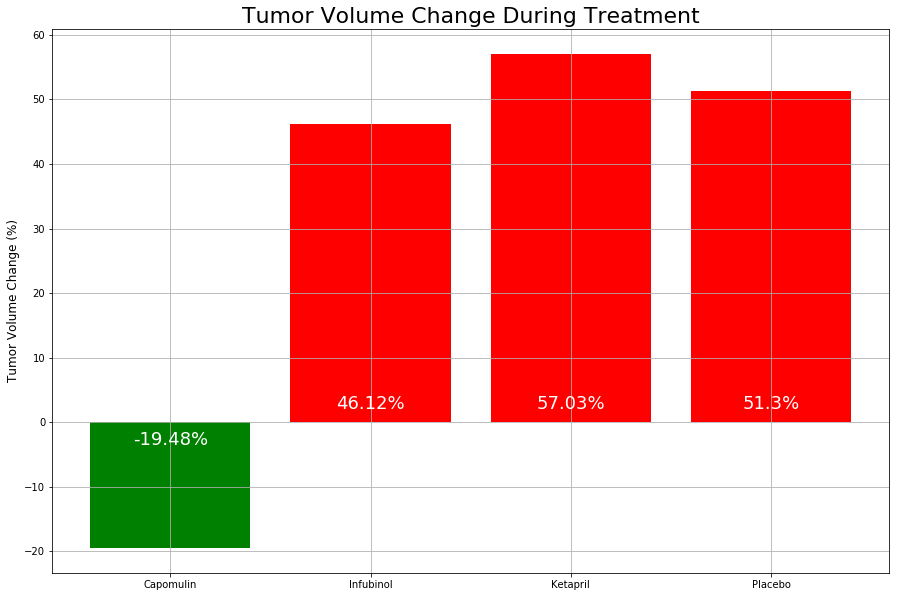

In [12]:
#build the Tumor Volume % Change Chart
x_axis = tumor_vols_change.index

# Setting up the plot for Metastatic Response to Treatment
fig, ax = plt.subplots(figsize=(15,10))
plt.title('Tumor Volume Change During Treatment', fontsize='22')
plt.ylabel('Tumor Volume Change (%)', fontsize='12')
# plt.xlim(0, len(x_axis)+1) 

# puts drug names as lables
plt.xticks(np.arange(len(x_axis)), x_axis) 

#graphs % change of tumor as bar graph
plt.bar(np.arange(len(tumor_vols_change)), tumor_vols_change, 
        # colors each bar appropriately based on + or - values by using a conditional
        color = ['red' if tumor_vols_change[value] > 0 else 'green' for value in np.arange(len(tumor_vols_change))]
       )

#loops through tumor change data and places the value in the correct position based on + or - values
loop_index = 0
for value in tumor_vols_change:
    if value < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(loop_index, y_coor, str(round(value, 2)) + '%', ha = 'center', color = 'white', fontsize='18')
    loop_index += 1

plt.grid()
plt.show()